<a href="https://colab.research.google.com/github/rupakarmakar/Image_Recognition_ML/blob/main/Image_Recognition_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rupakarmakar","key":"89dcd27b2d4df8b352e63a85b62aa149"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mannu1170/minst-dataset")

print("Path to dataset files:", path)

100%|██████████| 11.0M/11.0M [00:00<00:00, 53.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mannu1170/minst-dataset/versions/1


In [ ]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {x_train.shape}")

Train reshaped: (60000, 28, 28, 1)


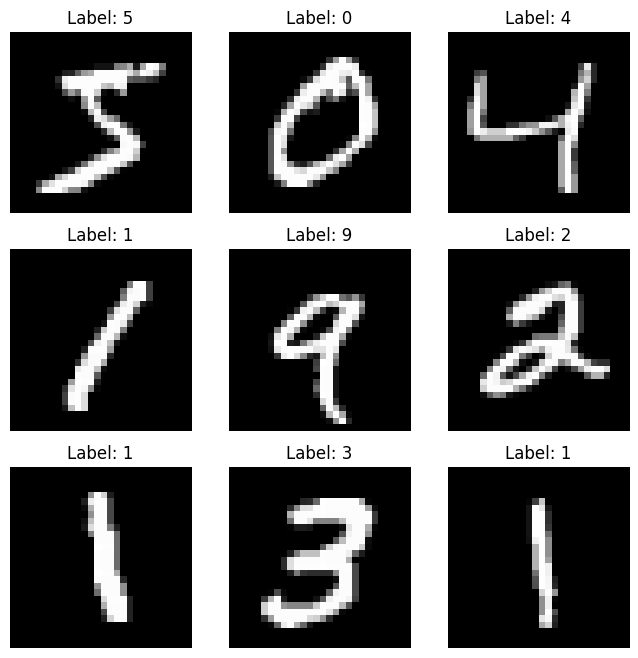

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
   plt.subplot(3,3,i+1)
   plt.imshow(x_train[i].reshape(28,28), cmap='gray')
   plt.title(f"Label: {y_train[i]}")
   plt.axis('off')
plt.show()

In [ ]:
(x_train_c10, y_train_c10), (x_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
x_train_c10 = x_train_c10 / 255.0
x_test_c10 = x_test_c10 / 255.0
print(f"CIFAR-10 train shape: {x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


DAY 02

What is Convulutional Neural Network(CNN)?

How does model training work?

Why do we use Dropout)

How to evaluate a model?

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax'),
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.9011 - loss: 0.3323 - val_accuracy: 0.9847 - val_loss: 0.0517
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.9855 - loss: 0.0463 - val_accuracy: 0.9868 - val_loss: 0.0440
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9902 - loss: 0.0295 - val_accuracy: 0.9889 - val_loss: 0.0401
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 34ms/step - accuracy: 0.9931 - loss: 0.0214 - val_accuracy: 0.9895 - val_loss: 0.0369
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - accuracy: 0.9948 - loss: 0.0159 - val_accuracy: 0.9899 - val_loss: 0.0392


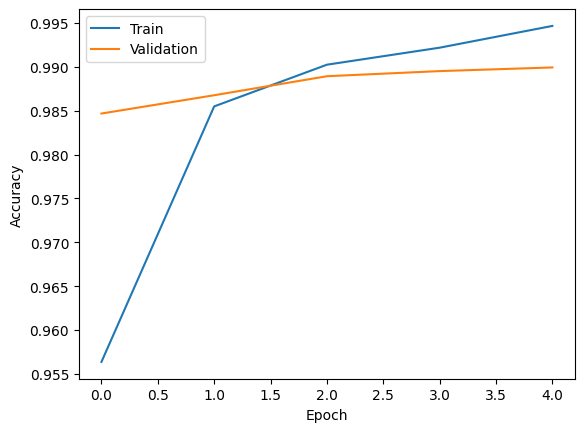

In [ ]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
        label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9885 - loss: 0.0378
Test Accuracy:{test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax'),
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Day 03

Why deeper CNNs?

What is Data Augmentation?

What is Advanced Evaluation Metrics?

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen= ImageDataGenerator(
     rotation_range=15,
     width_shift_range=0.1,
     height_shift_range=0.1,
     horizontal_flip=True
)
datagen.fit(x_train_c10)

In [ ]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
     Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
     BatchNormalization(),
     MaxPooling2D(2,2),
     Conv2D(64, (3,3), activation='relu'),
     MaxPooling2D(2,2),
     Conv2D(128, (3,3), activation='relu'),
     MaxPooling2D(2,2),
     Flatten(),
     Dense(256, activation='relu'),
     Dropout(0.5),
     Dense(10, activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=10,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 129s 81ms/step - accuracy: 0.3325 - loss: 1.7958 - val_accuracy: 0.4761 - val_loss: 1.4570
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.5253 - loss: 1.3268 - val_accuracy: 0.5081 - val_loss: 1.3580
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.5820 - loss: 1.1873 - val_accuracy: 0.5736 - val_loss: 1.2119
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.6123 - loss: 1.1089 - val_accuracy: 0.6014 - val_loss: 1.1054
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 126s 81ms/step - accuracy: 0.6359 - loss: 1.0439 - val_accuracy: 0.6713 - val_loss: 0.9534
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.6489 - loss: 1.0192 - val_accuracy: 0.6708 - val_loss: 0.9687
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 83ms/step - accuracy: 0.6629 - loss: 0.9844 - val_accuracy: 0.6726 - val_loss: 0.9606
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 78ms/step - accuracy: 0.6703 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.79      0.89      0.84      1000
           2       0.74      0.49      0.59      1000
           3       0.56      0.52      0.54      1000
           4       0.69      0.69      0.69      1000
           5       0.64      0.66      0.65      1000
           6       0.80      0.75      0.78      1000
           7       0.66      0.82      0.73      1000
           8       0.88      0.77      0.82      1000
           9       0.70      0.85      0.77      1000

    accuracy                           0.72     10000
   macro avg       0.72      0.72      0.71     10000
weighted avg       0.72      0.72      0.71     10000



<function matplotlib.pyplot.show(close=None, block=None)>

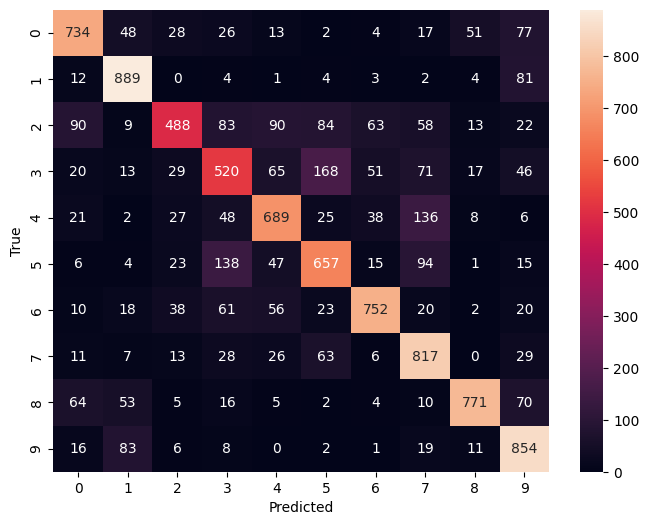

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred_c10)
print(classification_report(y_test_c10,y_pred_c10))

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

DAY 04

What are pre-trained model? MobileNetV2 , ResNet ,VGG ,ImageNet

What is Transfer Learning?

How to Fine-Tune and Optimize?

How to Deploy a Model?

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 95% 208M/218M [00:00<00:00, 361MB/s] 
100% 218M/218M [00:00<00:00, 377MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r')as zip_ref:
   zip_ref.extractall('/content/dogs-vs-cats')

In [ ]:

datagen= ImageDataGenerator(rescale=1./255, validation_split=0.2 )
train_generator = datagen.flow_from_directory(
      '/content/dogs-vs-cats',
      target_size=(224,224),
      batch_size=32,
      class_mode='binary',
      subset='training'
)
val_generator = datagen.flow_from_directory(
      '/content/dogs-vs-cats',
      target_size=(224,224),
      batch_size=32,
      class_mode='binary',
      subset='validation'
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

model=Sequential([base_model,GlobalAveragePooling2D(),Dense(128,activation='relu'),Dense(1,activation='sigmoid')])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=5,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 504s 2s/step - accuracy: 0.7939 - loss: 0.5361 - val_accuracy: 0.7985 - val_loss: 0.5149
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.7990 - loss: 0.4967 - val_accuracy: 0.7985 - val_loss: 0.5254
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - accuracy: 0.7987 - loss: 0.4883 - val_accuracy: 0.7990 - val_loss: 0.5188
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 414s 2s/step - accuracy: 0.8020 - loss: 0.4666 - val_accuracy: 0.7990 - val_loss: 0.5352
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 514s 2s/step - accuracy: 0.8065 - loss: 0.4419 - val_accuracy: 0.7501 - val_loss: 0.5684


In [ ]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
             loss='binary_crossentropy',metrics=['accuracy']
             )
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1802s 7s/step - accuracy: 0.7953 - loss: 0.4869 - val_accuracy: 0.7641 - val_loss: 0.5557
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1765s 7s/step - accuracy: 0.8053 - loss: 0.4415 - val_accuracy: 0.7686 - val_loss: 0.5533
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1770s 7s/step - accuracy: 0.8082 - loss: 0.4166 - val_accuracy: 0.7591 - val_loss: 0.5599


In [ ]:
model.save('mobilenet_cats_dogs.h5')
#To load
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 90s 1s/step


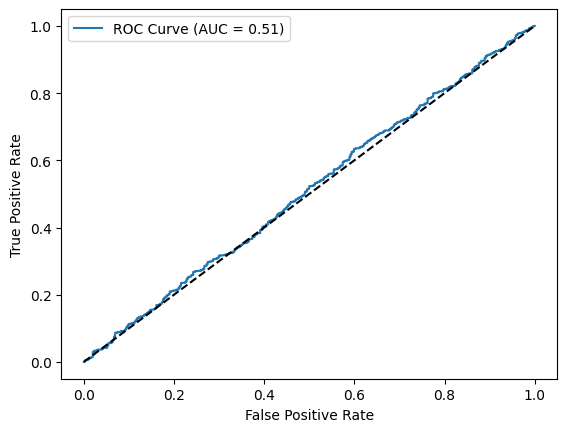

In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Day 05

How to Predict on New Data?

How to Create Portfolio Assets?

How to Present Results?

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

# Get the filename of the uploaded file
img_path = list(uploaded.keys())[0]

img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving beautiful-golden-retriever-cute-puppy-600nw-2526542701 (1).jpg to beautiful-golden-retriever-cute-puppy-600nw-2526542701 (1) (4).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Predicted class: Dog


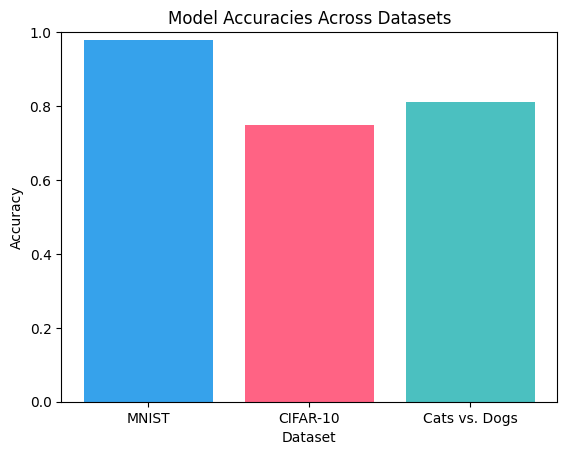

In [ ]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.81]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()